About dataset:
UCI HAR Dataset, taken from kaggle

*   Collection Source: using smartphone sensors, the dataset involves 30 subjects performing 4 everyday activities (Treadmill, Stair_Ascending, Stair_Descending, Static or Rest state).
*   Features: It consist of 561 precomputed features derived from accelerometer and gyroscope signals, encapsulating both time and frequency domain information.
*   Benchmark Standard: Widely used in human activity recognition research, this dataset serves as a solid benchmark for evaluating machine learning and deep learning models.








import basic libraries and mount google drive
*  To read and understand csv files



In [1]:
import pandas as pd
import numpy as np
from google.colab import drive # since my data is present in my google drive
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount Google Drive

drive.mount(r'/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Define the paths to your CSV files on Google Drive

train_csv_path = '/content/drive/My Drive/DL_Project/train.csv'
test_csv_path = '/content/drive/My Drive/DL_Project/test.csv'


In [4]:
# Load the CSV files using pandas

train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

Viewing dataset to understand it further

In [5]:
# Check the first few rows and the columns to verify data structure

print("===============================")
print("Training Data")
print("===============================")
train_df.head()

Training Data


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,Recovery
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,Recovery
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,Recovery
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,Recovery
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,Recovery


In [6]:
# Check the first few rows and the columns to verify data structure
print("===============================")
print("Testing Data")
print("===============================")
test_df.head()

Testing Data


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,Recovery
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,Recovery
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,Recovery
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,Recovery
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,Recovery


Concatinating both files to perform EDA

In [7]:
# Concatenate dataframes along rows (axis=0)
combined_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
print("\nCombined Data Shape:", combined_df.shape)


Combined Data Shape: (10299, 563)


In [8]:
print(combined_df['Activity'].unique())

['Recovery' 'Treadmill' 'Stair_Descending' 'Stair_Ascending']


In [9]:
combined_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,Recovery
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,Recovery
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,Recovery
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,Recovery
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,Recovery


# Exploratory Data Analysis (EDA)

*   It will help us to understand the data distribution, identifying missing values.


Identifying missing values by Visualizes missing data using a heatmap


*   To identify, if we need to drop or fill missing values



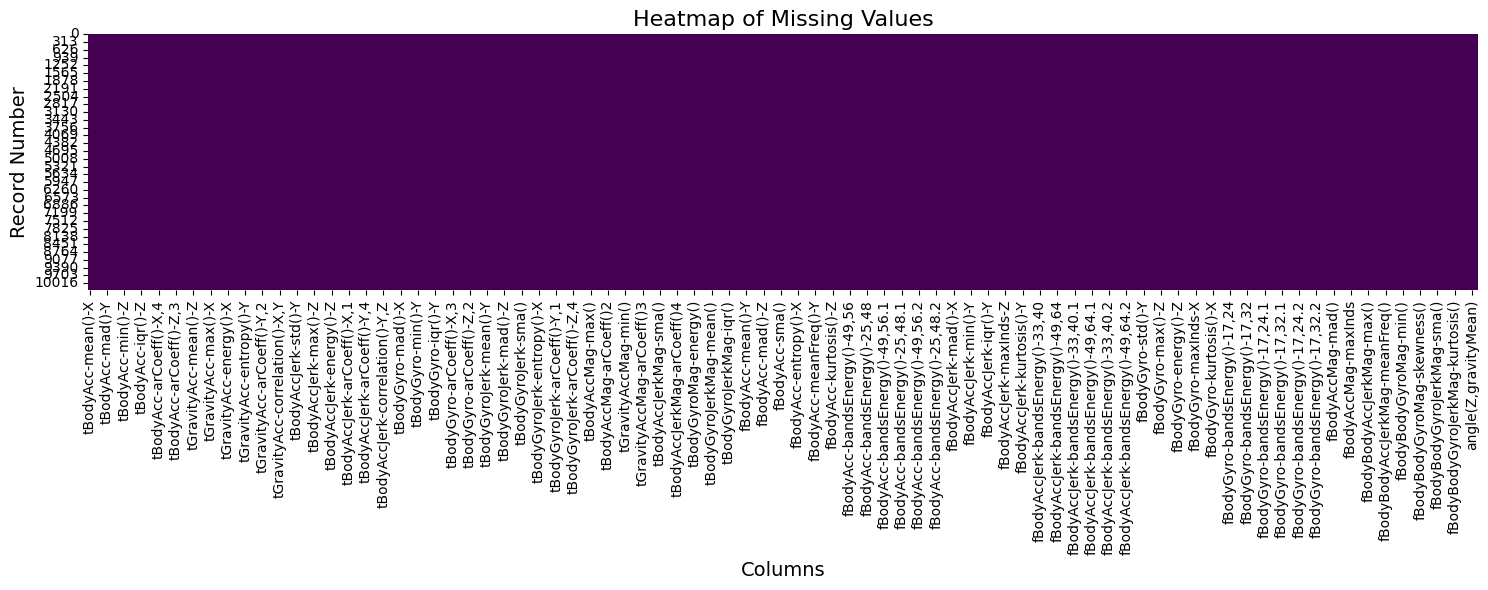

In [10]:
# Calculate the number of missing values per column
missing_counts = combined_df.isnull().sum()

# Filter to only show columns that have missing values
missing_counts = missing_counts[missing_counts > 0]

# Create a binary DataFrame where missing entries are True, then convert to integers.
missing_binary = combined_df.isnull().astype(int)

plt.figure(figsize=(15, 6))
sns.heatmap(missing_binary, cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values", fontsize=16)
plt.xlabel("Columns", fontsize=14)
plt.ylabel("Record Number", fontsize=14)
plt.tight_layout()
plt.show()


Conclusion: Since there are no highlighted values in the heatmap, it means there is no missing value in any column

Activities distributions are used to identify how the values or data are distributed.


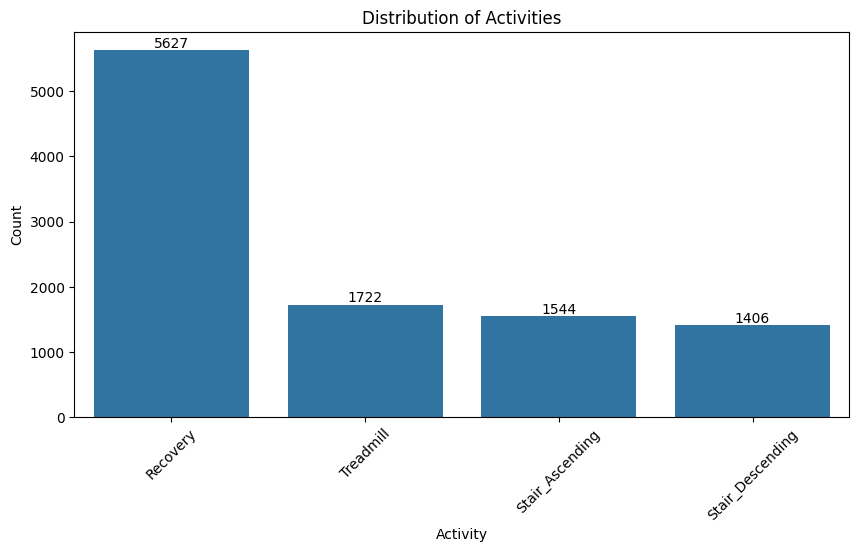

In [11]:
#Visualize the Distribution of the Target Variable (Activity)

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=combined_df, x='Activity',order=combined_df['Activity'].value_counts().index)
plt.title('Distribution of Activities')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)

for container in ax.containers: # Add count labels on top of each bar
  ax.bar_label(container)

plt.show()


# Re -Mapping/labelling of activity column


*   Here we are defining the label 0, 1, 2 and 3 for all three activities on the basis of their fatigue value
*   Treadmill: 3: High Fatigue, Stair_Ascending: 2: Moderate Fatigue, Stair_Descending:1: Low Fatigue, Recovery: 0: Static or rest phase



In [12]:
# Mapping/labelling of activity column and adding it into combined data

label_mapping = {
    'Treadmill': 3, #Treadmill Walking (as if running or walking on a treadmill involves full body exceration)
    'Stair_Ascending': 2, #Stair Ascending (captures the increased exertion of climbing stairs, but less than treadmill)
    'Stair_Descending': 1, #Stair Descending (involves more eccentric control and less exceration than Stair Ascending)
    'Recovery': 0 #Static Recovery ( low-activity or rest phase)
}

# Create a new column for fatigue levels using the mapping dictionary.
combined_df['Fatigue_Level'] = combined_df['Activity'].map(label_mapping)

Just to check!

In [13]:
# Verify the unique values in the new column.
print("\nUnique fatigue levels in combined data:", combined_df['Fatigue_Level'].unique())


Unique fatigue levels in combined data: [0 3 1 2]


In [14]:
combined_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Fatigue_Level
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,Recovery,0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,Recovery,0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,Recovery,0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,Recovery,0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,Recovery,0


# Prepare Features and Labels

Assuming that all columns except 'Activity', 'Fatigue_Level', and 'Source' are features to train.


*   Splits the data into features (X) and targets (y) in 80:20 ratio
*   Uses StandardScaler from scikit-learn to standardize the feature values, ensuring that they are centered and have unit variance (so that every variable contributes equally to the model’s training process).



In [15]:
feature_columns = [col for col in combined_df.columns if col not in ['Activity', 'Fatigue_Level', 'Source']]

X = combined_df[feature_columns].values  # Feature matrix
y = combined_df['Fatigue_Level'].values   # Labels

Split the Data into Training and Testing Sets: After combining the data, we perform a new random split into training and test sets.

In [16]:
from sklearn.model_selection import train_test_split

# We use an 80/20 split here.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
print("===============================")
print("After splitting:")
print("===============================")
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

After splitting:

X_train shape: (8239, 562)
X_test shape: (2060, 562)


Standard Normalization: (x - mean(x)) / StdDev (x);
where x is the value from each column

In [18]:
# Normalize features using StandardScaler so that each feature contributes equally.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Deep learning Model building

Define a feedforward dense (feedforward) neural network, that will learn from the preprocessed data, in which the hidden layers learn abstract representations, while dropout helps mitigate overfitting.

In [19]:
# impoting all required DL libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [20]:
# Since X_train_scaled is already computed by normalizing the data. Hnce, X_train_scaled.shape should be (num_samples, num_features)
num_features = X_train_scaled.shape[1]
num_classes = 4  # Fatigue levels: 0 (Recovery), 1(low), 2 (Moderate), 3(High)


# Model Creation:
*   An input layer that matches the number of features.
*   **Dense (hidden layer):** Fully connected/dense to the inputs of the layer, with activation function ReLu (Rectified Linear unit). ReLU outputs zero for negative inputs and linear value for positive inputs, which helps to speed up and stabilize learning.

* **Dropout with 50%:** means that during training, 50% of the neurons in the preceding layer will be randomly set to zero. This helps prevent “overfitting,” where the model memorizes the training set rather than learning patterns that generalize well.
*   **Output layer:** It has as many neurons as our classes to predict (ie. 4), activation functions is softmax, means the output of this layer is turned into probabilities (one probability per class—that sum up to 1)








To compile the model:
*   **Optimizer used is Adam optimization algorithm**, as it efficiently adapts the learning rate during training.
*   **Loss function is Sparse_categorical_crossentropy** indicates the error calculation method used for classification tasks.
*  **Metrics is Accuracy** which helps the model to track how many predictions are correct as a main performance metric.






In [21]:
model = Sequential()

# to add first hidden layer to our network: here layer has 256 neurons means each neuron is fully connected/dense to the inputs of the layer
model.add(Dense(256, activation='relu', input_shape=(num_features,)))
# to add dropout layer
model.add(Dropout(0.5))

# second hidden layer with 128 neurons: fully connected and uses the ReLU activation function
model.add(Dense(128, activation='relu'))
# Dropout layer: zeroes out 50% of the neurons randomly in the previous layer during training, giving the network a better chance to learn generalized features.
model.add(Dropout(0.5))

# to add output layer: for multi-class classification: to get probabilities for each possible label
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with the Adam optimizer, sparse_categorical_crossentropy, and accuracy metric: It ties everything together and guide the model how to learn and what metric to watch
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Show a summary of the model architecture: helps to confirm the right architecture before training
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       144,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,540 (693.52 KB)

 Trainable params: 177,540 (693.52 KB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [22]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_test_scaled, y_test)
)

Epoch 1/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8179 - loss: 0.5284 - val_accuracy: 0.9835 - val_loss: 0.0509
Epoch 2/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9664 - loss: 0.0985 - val_accuracy: 0.9913 - val_loss: 0.0273
Epoch 3/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9832 - loss: 0.0486 - val_accuracy: 0.9937 - val_loss: 0.0252
Epoch 4/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9886 - loss: 0.0330 - val_accuracy: 0.9961 - val_loss: 0.0137
Epoch 5/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9917 - loss: 0.0244 - val_accuracy: 0.9966 - val_loss: 0.0142
Epoch 6/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9944 - loss: 0.0192 - val_accuracy: 0.9961 - val_loss: 0.0128
Epoch 7/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9918 - loss: 0.0241 - val_accuracy: 0.9976 - val_loss: 0.0108
Epoch 8/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9934 - loss: 0.0261 - val_accuracy: 

# Model Evaluation:



# (i) Accuracy



In [23]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9986 - loss: 0.0298
Test Accuracy: 99.90%


Model is acheving an overall acurracy between 98.20% - 99.90%


# (ii) Accuracy and loss over epochs plots

Plotting accuracy and loss over epochs provides a visual insight into the
model's learning dynamics, helping to diagnose issues like overfitting or underfitting.


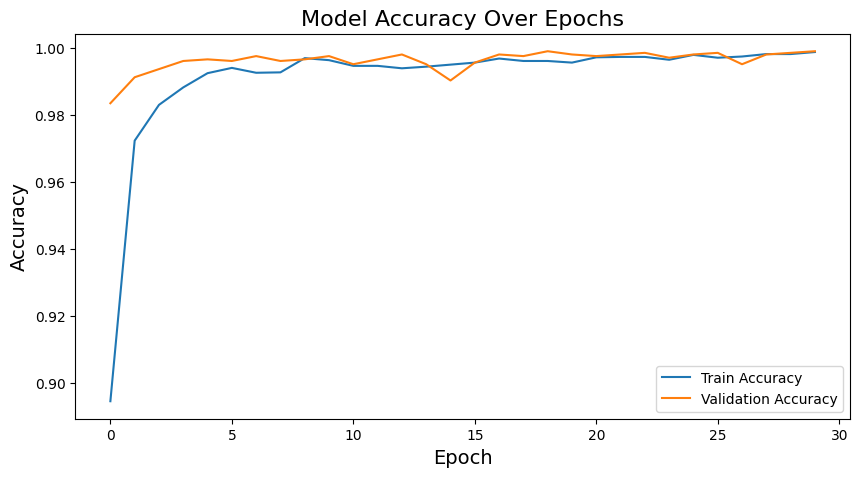

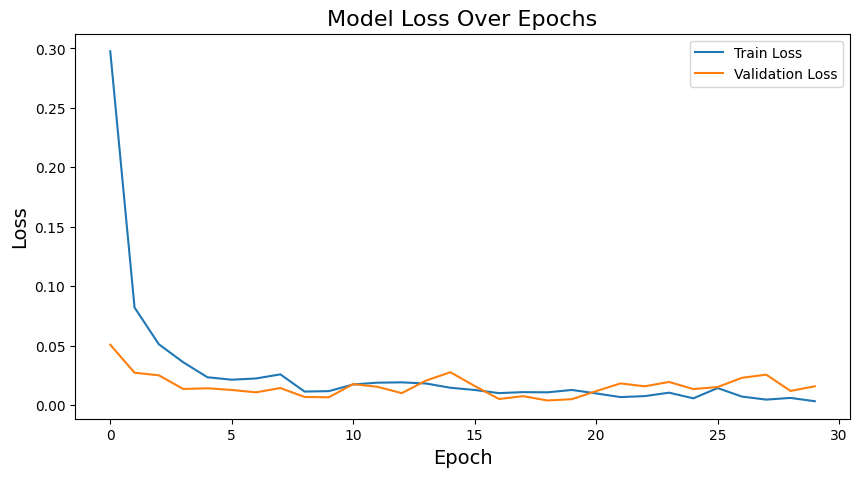

In [33]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.show()




*   For Model Accuracy Over Epochs:
    * Training and validation accuracy start low and quickly rise to nearly 99%.
    Since both lines are high and similar, it indicates the model learns well and generalizes to unseen data.

*   For Model Loss Over Epochs:
    *   Both training and validation loss drop rapidly from high values to near zero.
    Since low and similar loss values are observed, mean the model makes very few mistakes on both sets.




---
*Conclusion: Model quickly learns to classify with nearly 99% accuracy and very low error, with training and validation results matching well, indicating strong generalization.*






# (iii) Confusion Matrix



65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


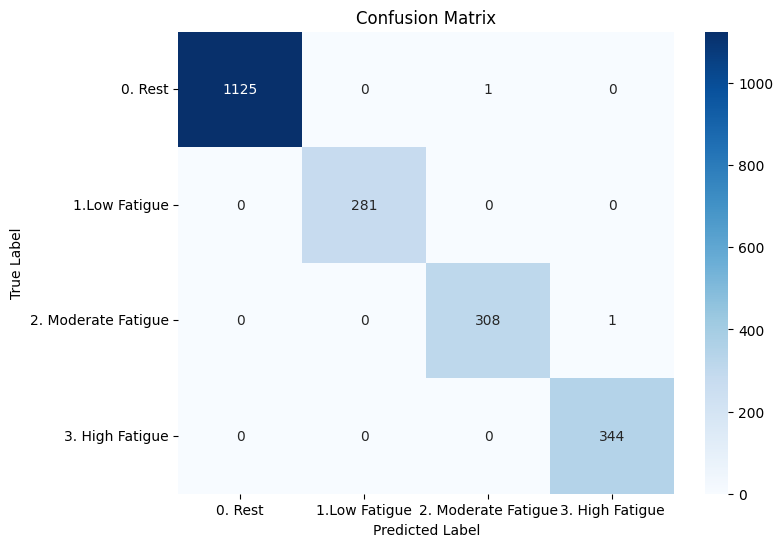

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example: Generate predictions from your trained model
# (adjust this to your code; e.g., if using a softmax, you may need to use argmax)
y_pred = model.predict(X_test_scaled).argmax(axis=1)

# Compute the confusion matrix (without normalization; change normalize='true' if needed)
cm = confusion_matrix(y_test, y_pred)

# Define the class names; update these strings to match your model's classes
class_names = ['0. Rest', '1.Low Fatigue', '2. Moderate Fatigue', '3. High Fatigue']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Represntation and  Interpretation:

*   **Diagonal:** values represent Correct predections, meaning the model mostly identifies Rest, Low Fatigue, Moderate Fatigue, and High Fatigue values correctly.

*   **Misclassifications:** Minimal nonzero count for Moderate Fatigue (3) indicates slight confusion.


---
*Conclusion:The network nearly always recognizes each fatigue level correctly, having veary negligible (that can be ignored) confusion.*




# (iii) Other Metrics


*   Precision
*   Recall
*   F1-Score





In [35]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Ensure your model outputs match your expectations.
# For example, if your model returns probabilities, apply argmax:
y_pred = model.predict(X_test_scaled).argmax(axis=1)

# Compute the classification report (returns a dictionary)
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Optionally, print the classification report as a DataFrame for inspection
report_df = pd.DataFrame(report_dict).transpose()
print(report_df)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score      support
0              1.000000  0.999112  0.999556  1126.000000
1              1.000000  1.000000  1.000000   281.000000
2              0.996764  0.996764  0.996764   309.000000
3              0.997101  1.000000  0.998549   344.000000
accuracy       0.999029  0.999029  0.999029     0.999029
macro avg      0.998466  0.998969  0.998717  2060.000000
weighted avg   0.999031  0.999029  0.999029  2060.000000




*   **Precision:** indicates what fraction of our positive predictions are truly correct, wich is.



*   **Recall:** indicates what proportion of actual positives are being caught by the model


*   **F1-Score:** As the harmonic mean of precision and recall, it balances both aspects and offers a single, robust metric for overall model performance, especially in cases of class imbalance (like ours).


---

*Conclusion:*

*   *All classes show near-perfect precision, recall, and F1 (> 0.98).*
*   *Accuracy ~99% indicates near-flawless classification overall.*
*   *Macro/Weighted averages around 0.99 confirm balanced performance across classes.*

# Since model seems to out-performing hence to further validate the reliability:

# Cross-Validation (KFold with k =5)

In [36]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for train_ix, val_ix in skf.split(X_train_scaled, y_train):
    X_tr, X_val = X_train_scaled[train_ix], X_train_scaled[val_ix]
    y_tr, y_val = y_train[train_ix], y_train[val_ix]

    temp_model = tf.keras.models.clone_model(model)
    temp_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])
    temp_model.fit(X_tr, y_tr, epochs=5, batch_size=64, verbose=0)
    loss, acc = temp_model.evaluate(X_val, y_val, verbose=0)
    scores.append(acc)
print("Cross-Val Accuracy Scores:", scores)
print("Mean CV Accuracy:", sum(scores)/len(scores))


Cross-Val Accuracy Scores: [0.9969660043716431, 0.9933252334594727, 0.990898072719574, 0.9933252334594727, 0.9951426982879639]
Mean CV Accuracy: 0.9939314484596252


It looks like the model is achieving near-perfect performance, even on cross-validation folds, indicating either:

*   There is Unintended Data Leakage or
*   The Data is Very Easily Separable, or
*   Model and features combination is highly effective

#(i) Checking for data leakage: duplicay in test and train data

In [37]:
# Example check for duplicates across train & test
train_rows_set = set(map(tuple, X_train_scaled))
overlap = 0
for row in X_test_scaled:
    if tuple(row) in train_rows_set:
        overlap += 1
print(f"Number of overlapping rows between train & test: {overlap}")


Number of overlapping rows between train & test: 0


Thoroughly scaned the training and test sets to see if any exact rows appear in both, which would indicate data leakage (the model seeing test examples during training).


---

*Conclusion: is zero overlaps — so no unintended leakage is found !*



# (ii) Checking whether data is Very Easily Separable
(Testing Logistic Regression Accuracy)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9980582524271845


Trained a simple Logistic Regression model as a sanity check. Remarkably, it also reaches about 99% accuracy, confirming that our dataset is inherently easy to classify or very well-separated.


---

**Conclusion: Above performed checks supports the reliability of our initial deep model’s results.**


---



# On spot trial:

In [39]:
def predict_onspot_from_file(file_path):

    # Load the new on-spot input data
    new_df = pd.read_csv(file_path)

    # Extract feature values.
    # NOTE: Ensure that new_df contains only the features that your model expects (e.g. 562 columns).
    new_features = new_df.values

    # Preprocess: Scale the new input features using the same scaler fitted on the training data.
    new_features_scaled = scaler.transform(new_features)

    # Generate prediction probabilities using the pre-trained Dense model (model_dense)
    prediction_probs = model.predict(new_features_scaled)

    # Determine the predicted class for each sample 0 (Recovery), 1(low), 2 (Moderate), 3(High)
    predicted_classes = np.argmax(prediction_probs, axis=1)

    # Add predictions and probabilities to a copy of the input DataFrame.
    predictions_df = new_df.copy()
    predictions_df['Predicted_Fatigue_Level'] = predicted_classes
    predictions_df['Recovery'] = prediction_probs[:, 0]
    predictions_df['Prob_Low'] = prediction_probs[:, 1]
    predictions_df['Prob_Moderate'] = prediction_probs[:, 2]
    predictions_df['Prob_High'] = prediction_probs[:, 3]


    return predictions_df

In [40]:
 # Call the On-Spot Testing Function

# Update the file path to point to your new CSV file. Make sure to include the actual file name.
new_file_path = '/content/drive/My Drive/DL_Project/T1.csv'

# Get predictions for the on-spot input data
predictions_from_file = predict_onspot_from_file(new_file_path)

print("\nPredictions for the new on-spot input data:")
predictions_from_file.head()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Predictions for the new on-spot input data:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Predicted_Fatigue_Level,Recovery,Prob_Low,Prob_Moderate,Prob_High
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.271151,-0.720009,0.276801,-0.057978,100,0,1.0,0.0,0.0,0.0


In [41]:
# Optionally, Save the Predictions to a New CSV File

output_file_path = '/content/drive/My Drive/DL_Project/OnSpotTest_Predictions.csv'
predictions_from_file.to_csv(output_file_path, index=False)
print("\nPredictions saved to:", output_file_path)



Predictions saved to: /content/drive/My Drive/DL_Project/OnSpotTest_Predictions.csv


# Thank You !